# Sentiment Analysis of IMDB Movie Reviews

## Import necessary libraries

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')


['IMDB Dataset.csv']


## Data loading

In [2]:
# importing the training data
imdb_data = pd.read_csv('../input/IMDB Dataset.csv')
print (imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## EDA

In [3]:
# summary of dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [4]:
imdb_data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

## Make train-test split

In [5]:
# train dataset
train_reviews = imdb_data.review[:40000]
train_sentiments = imdb_data.sentiment[:40000]

# test dataset
test_reviews = imdb_data.review[40000:]
test_sentiments = imdb_data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


## Normalization

In [6]:
# tokenization of text
tokenizer = ToktokTokenizer()

# setting stopwords
stopword_list = nltk.corpus.stopwords.words('english')

In [7]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_noise(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

imdb_data['review'] = imdb_data['review'].apply(remove_noise)

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)

## Stemming

In [8]:
# stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

imdb_data['review'] = imdb_data['review'].apply(simple_stemmer)

In [9]:
# set stopwords to english
stop = set(stopwords.words('english'))
print(stop)

# removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
    
imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)

{'weren', 'an', "needn't", 'y', 'when', 'shan', 'while', 'doing', 'whom', "aren't", 'that', 'all', 'do', "haven't", 'at', 'but', 'same', 'out', 'ain', 'during', 'other', 'own', 'too', "didn't", 'were', 'is', 'he', 'through', 'hasn', 'only', 'just', 'isn', 'most', 'o', 'our', 't', 'we', "you're", "it's", 'down', 'won', 'this', "you've", 'yours', 'ours', 'ourselves', 'has', 'how', 'not', 'll', 'haven', 'myself', 'mightn', "couldn't", "wouldn't", 's', "she's", 'some', 'there', 'from', "don't", 'his', 'with', "doesn't", 'a', 'before', 'its', "wasn't", 'am', 're', 'to', 'up', 'hers', 'in', 'wouldn', 'which', 'or', 'does', "shouldn't", 'had', "shan't", 'no', 'such', 'and', 'her', 'by', 'what', 'for', 'having', 'didn', 'after', 'into', 'very', 'any', 'doesn', 'yourselves', 'i', 'be', 'these', 'over', 'them', 'wasn', 'their', 'against', 've', 'me', 'of', 'themselves', "isn't", 'aren', "mustn't", 'about', 'have', 'm', 'each', 'where', 'between', 'don', 'was', 'she', 'off', 'then', 'd', 'it', 'w

In [10]:
# normalized train reviews
norm_train_reviews = imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [11]:
# normalized test reviews
norm_test_reviews = imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

## Bag of words

In [12]:
# count vectorizer for bag of words
cv = CountVectorizer(min_df = 0,max_df = 1,binary = False, ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


## Term Frequency-Inverse Document Frequency model (TFIDF)

In [13]:
# Tfidf vectorizer
tv = TfidfVectorizer(min_df = 0, max_df = 1, use_idf = True, ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews = tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


## Labeling the sentiment text 

In [14]:
# labeling the sentiment data
lb = LabelBinarizer()
sentiment_data = lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [15]:
# spliting the sentiment data
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Building Logistic Regression model

In [16]:
# training the model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# fitting the model for Bag of words
lr_bow = lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

# fitting the model for tfidf features
lr_tfidf = lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


## Logistic regression model performance on test dataset

In [17]:
# predicting the model for bag of words
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)

# predicting the model for tfidf features
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


## Accuracy

In [18]:
# accuracy score for bag of words
lr_bow_score = accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

# accuracy score for tfidf features
lr_tfidf_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


In [19]:
# classification report for bag of words 
lr_bow_report = classification_report(test_sentiments,lr_bow_predict,target_names = ['Positive','Negative'])
print(lr_bow_report)

# classification report for tfidf features
lr_tfidf_report = classification_report(test_sentiments,lr_tfidf_predict,target_names = ['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



## Multinomial Naive Bayes for bag of words and tfidf features

In [20]:
# training the model
mnb = MultinomialNB()

# fitting the model for bag of words
mnb_bow = mnb.fit(cv_train_reviews, train_sentiments)
print(mnb_bow)

# fitting the model for tfidf features
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


## Multinomial Naive Bayes Model performance on test data

In [21]:
# predicting the model for bag of words
mnb_bow_predict = mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

# predicting the model for tfidf features
mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


## Accuracy

In [22]:
# accuracy score for bag of words
mnb_bow_score = accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

# accuracy score for tfidf features
mnb_tfidf_score = accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


In [23]:
# classification report for bag of words 
mnb_bow_report = classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

# classification report for tfidf features
mnb_tfidf_report = classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



## Word Clouds for Positive and Negative reviews

<function matplotlib.pyplot.show(*args, **kw)>

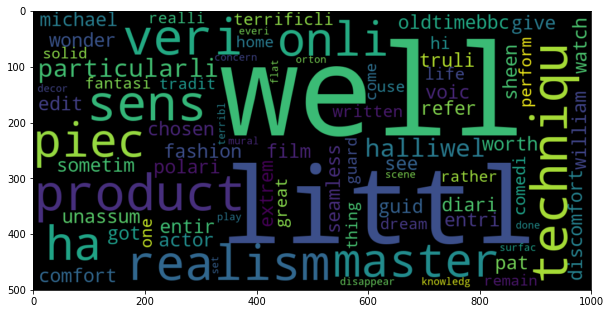

In [24]:
# word cloud for positive review words
plt.figure(figsize = (10,10))
positive_text = norm_train_reviews[1]
wordcloud = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words = wordcloud.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

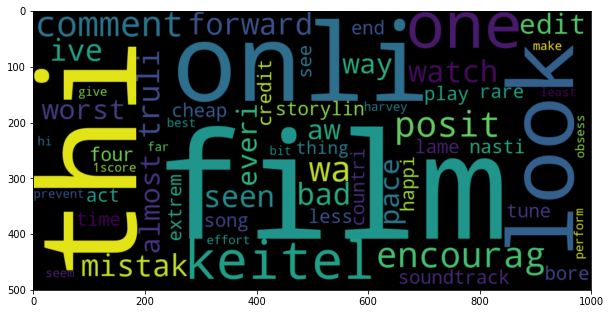

In [25]:
# word cloud for negative review words
plt.figure(figsize = (10,10))
negative_text = norm_train_reviews[8]
wordcloud = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words = wordcloud.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show